In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
data = pd.read_csv('Portuguese.csv')

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns


In [108]:
object_list = []
for i in range(len(data.dtypes)):

    if data.dtypes[i] == 'object':
        object_list.append(data.columns[i])
object_list 


['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [109]:
data[object_list] = data[object_list].apply(lambda x: pd.factorize(x)[0])
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,0,1,1,1,0,1,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,1,1,1,1,0,1,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,0,1,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,0,1,3,3,2,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,1,1,3,1,4,2,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,0,1,1,1,2,1,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,1,1,3,1,3,2,...,2,4,5,3,4,2,6,10,10,10


In [110]:
X = data.drop(['G1', 'G2', 'G3'], axis = 1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,0,0,4,4,0,0,...,0,0,0,4,3,4,1,1,3,4
1,0,0,17,0,0,1,1,1,0,1,...,0,1,0,5,3,3,1,1,3,2
2,0,0,15,0,1,1,1,1,0,1,...,0,1,0,4,3,2,2,3,3,6
3,0,0,15,0,0,1,4,2,1,2,...,0,1,1,3,2,2,1,1,5,0
4,0,0,16,0,0,1,3,3,2,1,...,0,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,1,...,0,1,0,5,4,2,1,2,5,4
645,1,0,18,0,1,1,3,1,4,2,...,0,1,0,4,3,4,1,1,1,4
646,1,0,18,0,0,1,1,1,2,1,...,0,0,0,1,1,1,1,1,5,6
647,1,1,17,0,1,1,3,1,3,2,...,0,1,0,2,4,5,3,4,2,6


In [111]:
y = data['G3']
y = y.reset_index(drop = True)
y[y[:]<= 10] = 0
y[y[:]>= 10] = 1
y

0      1
1      1
2      1
3      1
4      1
      ..
644    0
645    1
646    0
647    0
648    1
Name: G3, Length: 649, dtype: int64

In [112]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [113]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

In [114]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

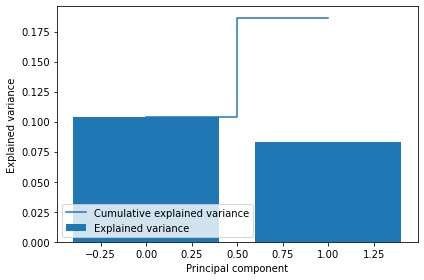

In [115]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

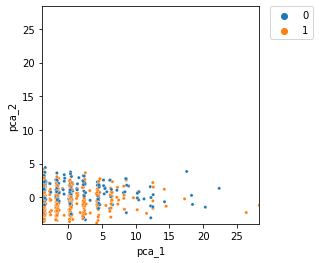

In [116]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min(), pca_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

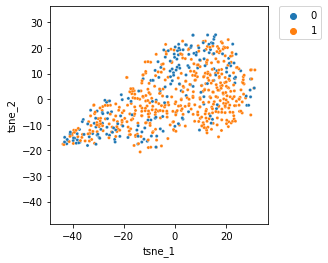

In [117]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [119]:
flower = load_sample_image('flower.jpg') 
flower = np.array(flower, dtype=np.float64) / 255


In [120]:
w, h, d = original_shape = tuple(flower.shape)
image_array = np.reshape(flower, (w * h, d))

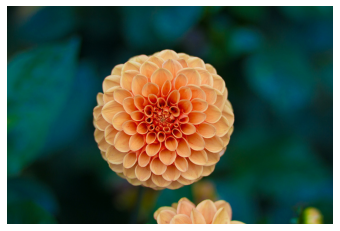

In [121]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.imshow(flower)

In [122]:
n_colors = [64, 32, 16, 8]

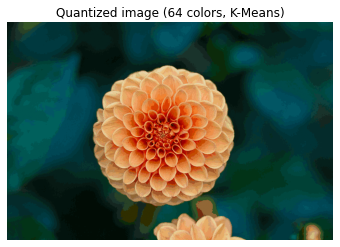

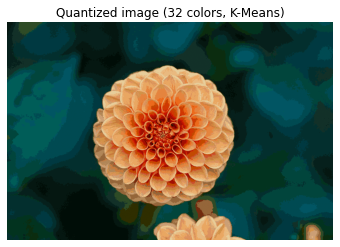

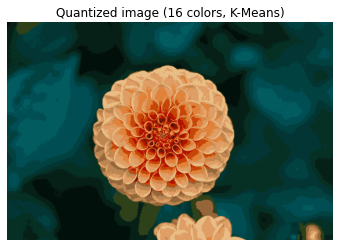

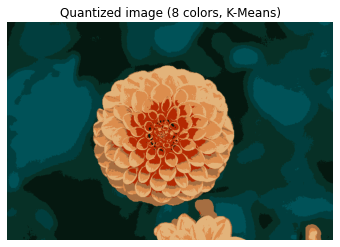

In [123]:
for n in n_colors:
    image_array_sample = shuffle(image_array, random_state=0, n_samples=300)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(image_array_sample)
    prediction = kmeans.predict(image_array)
    plt.figure(n)
    plt.clf()
    plt.title(f"Quantized image ({n} colors, K-Means)")
    plt.axis("off")
    plt.imshow(kmeans.cluster_centers_[prediction].reshape(w, h, -1))

    

In [124]:
df = pd.read_csv('spam_normal_emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [125]:
df.shape

(5728, 2)

In [126]:
df.columns

Index(['text', 'spam'], dtype='object')

In [127]:
from collections import Counter
Counter( df['spam'])

Counter({1: 1368, 0: 4360})

In [128]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [129]:
df_lower = pd.concat([df['spam'], df['text'].str.lower()], axis=1)
df_lower

,spam,text
0,1,subject: naturally irresistible your corporate...
1,1,subject: the stock trading gunslinger fanny i...
2,1,subject: unbelievable new homes made easy im ...
3,1,subject: 4 color printing special request add...
4,1,"subject: do not have money , get software cds ..."
...,...,...
5723,0,subject: re : research and development charges...
5724,0,"subject: re : receipts from visit jim , than..."
5725,0,subject: re : enron case study update wow ! a...
5726,0,"subject: re : interest david , please , call..."


In [130]:
stop = stopwords.words('english')
stop[:5]

['i', 'me', 'my', 'myself', 'we']

In [131]:
df_lower['text'] = df['text'].str.replace('[{}]'.format(string.punctuation), '')
df_lower

,spam,text
0,1,Subject naturally irresistible your corporate ...
1,1,Subject the stock trading gunslinger fanny is...
2,1,Subject unbelievable new homes made easy im w...
3,1,Subject 4 color printing special request addi...
4,1,Subject do not have money get software cds fr...
...,...,...
5723,0,Subject re research and development charges t...
5724,0,Subject re receipts from visit jim thanks ...
5725,0,Subject re enron case study update wow all ...
5726,0,Subject re interest david please call shi...


In [132]:

df_lower['text'] = df_lower['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df_lower)

      spam                                               text
0        1  Subject naturally irresistible corporate ident...
1        1  Subject stock trading gunslinger fanny merrill...
2        1  Subject unbelievable new homes made easy im wa...
3        1  Subject 4 color printing special request addit...
4        1  Subject money get software cds software compat...
...    ...                                                ...
5723     0  Subject research development charges gpg forwa...
5724     0  Subject receipts visit jim thanks invitation v...
5725     0  Subject enron case study update wow day super ...
5726     0  Subject interest david please call shirley cre...
5727     0  Subject news aurora 5 2 update aurora version ...

[5728 rows x 2 columns]


In [133]:
from wordcloud import WordCloud


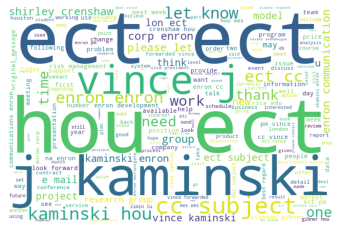

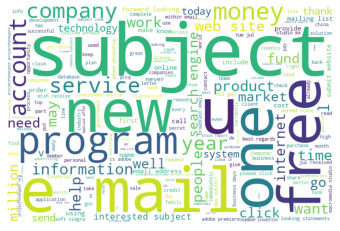

In [134]:
def visualize(label):
    text = ''
    for msg in df_lower[df_lower['spam'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize(0)
visualize(1)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.20)

In [136]:
print(X_train.shape, y_train.shape)

(4582,) (4582,)


In [137]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [138]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [139]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       1.00      0.99      0.99       271

    accuracy                           1.00      1146
   macro avg       1.00      0.99      1.00      1146
weighted avg       1.00      1.00      1.00      1146



In [141]:
print(confusion_matrix(y_test, y_pred))

[[875   0]
 [  4 267]]




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.9 MB

The following NEW packages will be INS